# Random forest con scikit-learn

In [ ]:
#Importamos las librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Nuestro dataset es **Pima indians diabetes** de Kaggle: https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv

In [36]:
import pandas as pd
import pandas as pd

# Replace this with the actual URL of your dataset
url = "https://www.google.com/url?q=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2Fkumargh%2Fpimaindiansdiabetescsv"

try:
    df_diabetes = pd.read_csv(url)
    print("Dataset loaded successfully from URL.")
except Exception as e:
    print(f"Error loading dataset from URL: {e}")

# Now you can work with the df_diabetes DataFrame
# For example, to display the first few rows:
# df_diabetes.head()
    df_diabetes = pd.read_csv(url)
    print("Dataset loaded successfully from URL.")
except Exception as e:
    print(f"Error loading dataset from URL: {e}")

# Now you can work with the df_diabetes DataFrame
# For example, to display the first few rows:
# df_diabetes.head()

Dataset loaded successfully from URL.


In [37]:
#Cargamos dataset a utilizar
df_diabetes = pd.read_csv("pima-indians-diabetes.csv.xls")

## Exploración de datos

In [38]:
#Visualizacion del dataframe
df_diabetes.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [14]:
#Renombramos las columnas
df_diabetes.columns = ['1. Número de embarazos', '2. Concentración de glucosa en plasma',
                        '3. Presión arterial diastólica (mm Hg)',
                        '4. Espesor del pliegue cutáneo del tríceps (mm)',
                        '5. Insulina sérica de 2 horas (mu U / ml)',
                        '6. Índice de masa corporal (peso en kg / (altura en m) ^ 2',
                        '7. Función del pedigrí de la diabetes', 'Edad (años)', '9. Variable de clase (0 o 1)']

In [15]:
#Verificacion de datos
df_diabetes.head()

,1. Número de embarazos,2. Concentración de glucosa en plasma,3. Presión arterial diastólica (mm Hg),4. Espesor del pliegue cutáneo del tríceps (mm),5. Insulina sérica de 2 horas (mu U / ml),6. Índice de masa corporal (peso en kg / (altura en m) ^ 2,7. Función del pedigrí de la diabetes,Edad (años),9. Variable de clase (0 o 1)
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


En este conjunto de datos hay 8 características  de entrada y 1 característica de salida / destino / target.

El significado de los nombres de las características es el siguiente:

* Número de embarazos.
* Concentración de glucosa en plasma a 2 horas en una prueba oral de tolerancia a la glucosa.
* Presión arterial diastólica (mm Hg).
* Espesor del pliegue cutáneo del tríceps (mm).
* Insulina sérica de 2 horas (mu U / ml).
* Índice de masa corporal (peso en kg / (altura en m) ^ 2).
* Función del pedigrí de la diabetes.
* Edad (años).
* Variable de clase (0 o 1).

In [17]:
#Analizamos el tamaño del objeto
df_diabetes.shape

(767, 9)

In [18]:
#Visualizamos los tipos de datos
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   1. Número de embarazos                                      767 non-null    int64  
 1   2. Concentración de glucosa en plasma                       767 non-null    int64  
 2   3. Presión arterial diastólica (mm Hg)                      767 non-null    int64  
 3   4. Espesor del pliegue cutáneo del tríceps (mm)             767 non-null    int64  
 4   5. Insulina sérica de 2 horas (mu U / ml)                   767 non-null    int64  
 5   6. Índice de masa corporal (peso en kg / (altura en m) ^ 2  767 non-null    float64
 6   7. Función del pedigrí de la diabetes                       767 non-null    float64
 7   Edad (años)                                                 767 non-null    int64  
 8   9

## Entrenamiento de random forest con scikit-learn

In [19]:
#Separamos en X e y
X = df_diabetes.drop("9. Variable de clase (0 o 1)", axis=1)
y = df_diabetes["9. Variable de clase (0 o 1)"]

In [20]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

In [21]:
#Importamos Random Forest
from sklearn.ensemble import RandomForestClassifier

#Creacion del modelo
random_forest = RandomForestClassifier(n_estimators=20, random_state=0)

In [22]:
#Entrenamiento
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [23]:
#Calculo de las predicciones en Train y Test
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

## Evaluación del modelo

In [24]:
#Importar metricas
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Calculo el exactitud en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el exactitud en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print("La exactitud en train es:", train_accuracy)
print("La exactitud en test es:", test_accuracy)



La exactitud en train es: 0.9956521739130435
La exactitud en test es: 0.758957654723127


In [26]:
# Evaluar
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.79      0.88      0.83       204
           1       0.68      0.52      0.59       103

    accuracy                           0.76       307
   macro avg       0.73      0.70      0.71       307
weighted avg       0.75      0.76      0.75       307



In [27]:
df_diabetes["9. Variable de clase (0 o 1)"].value_counts()

,count
9. Variable de clase (0 o 1),
0,500
1,267


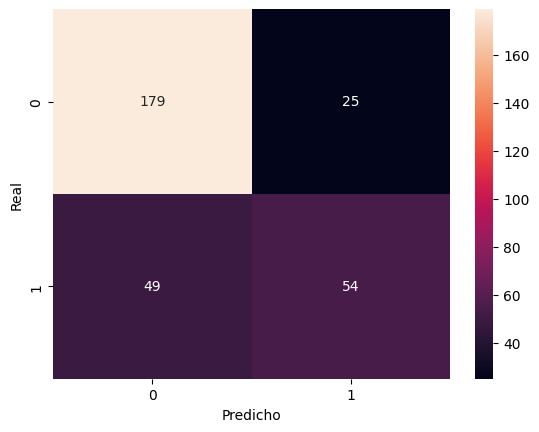

In [28]:
# Matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

In [29]:
#Verificamos el feature importances
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importancia": random_forest.feature_importances_}).sort_values("importancia", ascending = False).round(2)

# Mostrar
feature_importances_df


,feature,importancia
1,2. Concentración de glucosa en plasma,0.21
7,Edad (años),0.16
5,6. Índice de masa corporal (peso en kg / (altu...,0.15
6,7. Función del pedigrí de la diabetes,0.14
0,1. Número de embarazos,0.10
4,5. Insulina sérica de 2 horas (mu U / ml),0.09
2,3. Presión arterial diastólica (mm Hg),0.08
3,4. Espesor del pliegue cutáneo del tríceps (mm),0.07


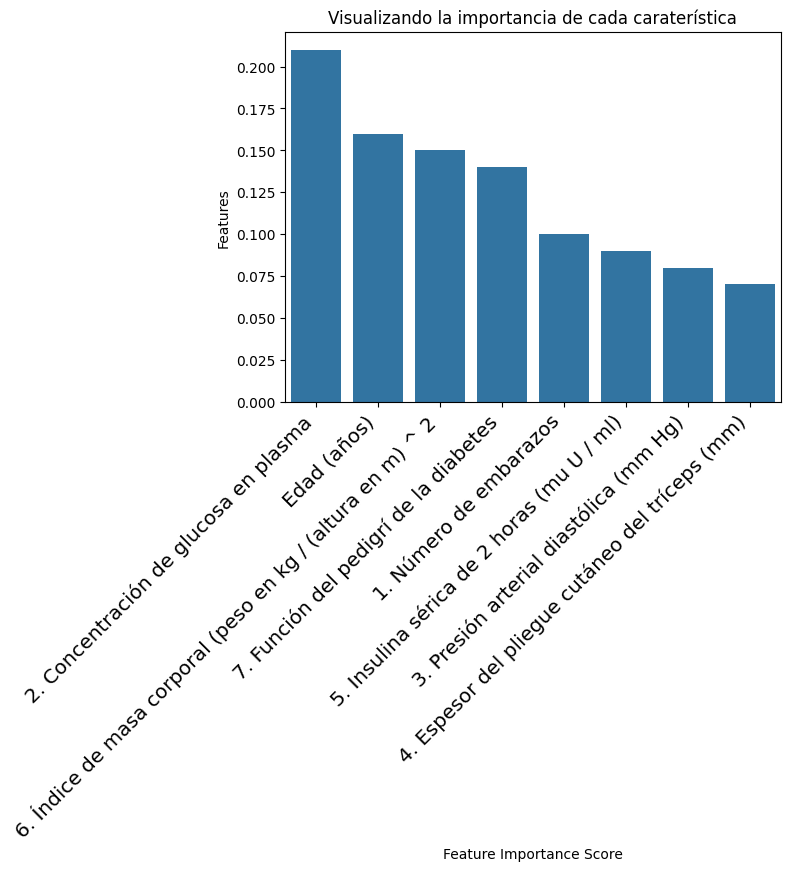

In [30]:
# Graficamos las importancias
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importancia)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizando la importancia de cada caraterística")
plt.xticks(rotation=45, horizontalalignment = "right", fontweight="light", fontsize="x-large")
plt.show()

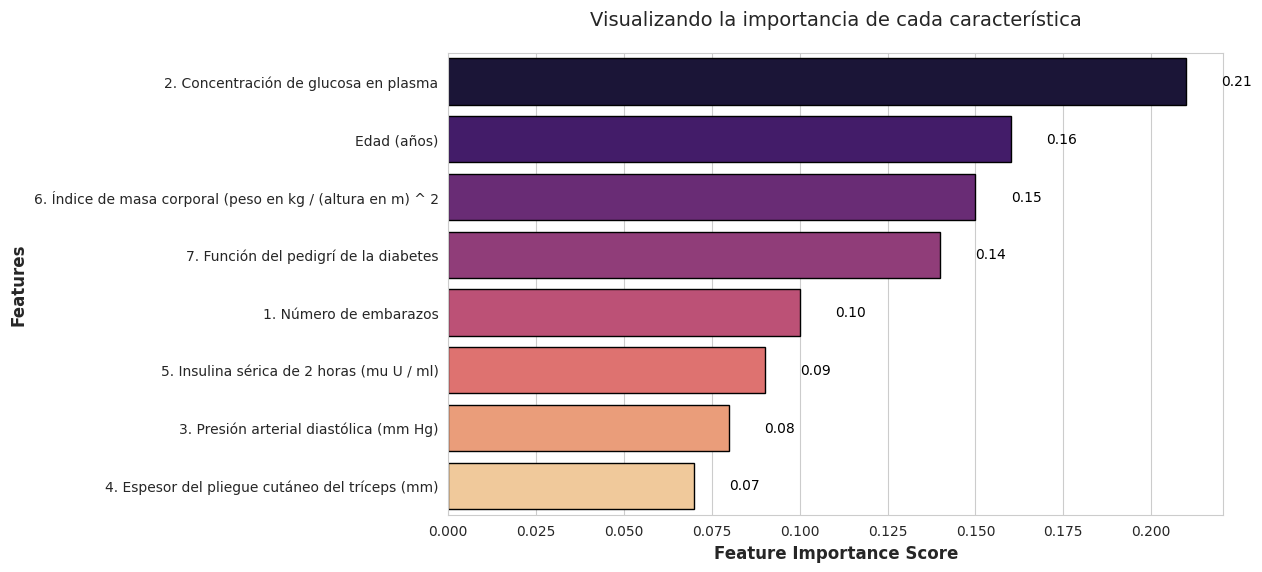

In [31]:
# Configura el estilo y la paleta de colores
sns.set_style("whitegrid")
paleta = sns.color_palette("magma", len(feature_importances_df))

# Graficamos las importancias con colores distintos
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x="importancia",
    y="feature",
    hue="feature",  # Asignamos 'feature' a hue para usar la paleta
    data=feature_importances_df,
    palette=paleta,
    edgecolor="black",
    linewidth=1,
    legend=False  # Desactivamos la leyenda (redundante)
)

# Personalizamos etiquetas y título
plt.xlabel("Feature Importance Score", fontsize=12, fontweight="bold")
plt.ylabel("Features", fontsize=12, fontweight="bold")
plt.title("Visualizando la importancia de cada característica", fontsize=14, pad=20)

# Ajustamos los ejes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Añadimos valores de importancia sobre las barras (opcional)
for i, v in enumerate(feature_importances_df["importancia"]):
    barplot.text(v + 0.01, i, f"{v:.2f}", color="black", va="center", fontsize=10)

plt.show()

# Probar el modelo con datos ejemplo

In [32]:
# Datos de prueba
nuevos_datos = pd.DataFrame({
    '1. Número de embarazos': [2, 5, 1],                   # Número de embarazos
    '2. Concentración de glucosa en plasma': [120, 85, 200],                   # Glucosa en plasma (mg/dL)
    '3. Presión arterial diastólica (mm Hg)': [70, 60, 90],               # Presión arterial (mm Hg)
    '4. Espesor del pliegue cutáneo del tríceps (mm)': [25, 20, 35],               # Grosor del pliegue cutáneo (mm)
    '5. Insulina sérica de 2 horas (mu U / ml)': [80, 100, 300],                   # Insulina (mu U/ml)
    '6. Índice de masa corporal (peso en kg / (altura en m) ^ 2': [28.5, 22.0, 35.0],                   # Índice de masa corporal
    '7. Función del pedigrí de la diabetes': [0.3, 0.5, 0.9], # Riesgo genético
    'Edad (años)': [30, 45, 50]                          # Edad (años)
})
nuevos_datos.head()

,1. Número de embarazos,2. Concentración de glucosa en plasma,3. Presión arterial diastólica (mm Hg),4. Espesor del pliegue cutáneo del tríceps (mm),5. Insulina sérica de 2 horas (mu U / ml),6. Índice de masa corporal (peso en kg / (altura en m) ^ 2,7. Función del pedigrí de la diabetes,Edad (años)
0,2,120,70,25,80,28.5,0.3,30
1,5,85,60,20,100,22.0,0.5,45
2,1,200,90,35,300,35.0,0.9,50


In [34]:
# Predecir con el modelo de Random Forest
predicciones = random_forest.predict(nuevos_datos)
probabilidades = random_forest.predict_proba(nuevos_datos)[:,1]

# Resultados
resultados = pd.DataFrame({
    'Caso': [1, 2, 3],
    'Predicción': predicciones,
    'Probabilidad_Diabetes': probabilidades.round(2)
})

print("\nResultados de predicción:")
print(resultados)


Resultados de predicción:
   Caso  Predicción  Probabilidad_Diabetes
0     1           0                   0.05
1     2           0                   0.10
2     3           1                   0.90
